# Author: MD Fakrul Islam, fakrul.islam@tsi.com.bd
# Import Necessery Library

In [2]:
import os, sys, math, time
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

Tensorflow version 1.14.0


# SET Image Dimension
# Model developed by images of (224,224) dimension is suitable for High Processor and Ram, Mean Validation Accuracy ~ 98%.
# Model developed by images of (32,32) Dimension is suitable for intel dev cloude edge platform for optimization using intel distributed openvino toolkit, Mean Validation Accuracy ~ 90%-92%.
# Create folder of names 32, 64, 128 and 224 under the Model Folder to create models of similar dimension. Image of 32*32 dimension has been shown in this codebase.
# Select right dimension that is suitable for your workstation(PROCESSOR and RAM)

In [3]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMAGE_SIZE = [IMG_HEIGHT, IMG_WIDTH]
print('Image Dimension Loaded')

Image Dimension Loaded


# Set Training and Validation IMAGE Path
# Set Saved Keras Model Path
# Set Saved Tensorflow Model Path

In [4]:
#Training Images
TRAIN_EarlyBlight_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Potato/train/EarlyBlight'
TRAIN_LateBlight_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Potato/train/LateBlight'
TRAIN_Healthy_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Potato/train/Healthy'

#Validating Images
VALIDATE_EarlyBlight_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Potato/val/EarlyBlight'
VALIDATE_LateBlight_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Potato/val/LateBlight'
VALIDATE_Healthy_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Potato/val/Healthy'

#Saved Keras Model Path
KERAS_PATH = '/home/fakrul/Documents/PlantPathology/Model/128/keras/potato.h5'

#Saved TensorFlow Model Path
TensorFlow_PATH='/home/fakrul/Documents/PlantPathology/Model/128/tf'

print('All path loaded')

All path loaded


# Load all Training and Validation IMAGES path in the memory

In [6]:
from os.path import join
from glob import glob

TrainEarlyBlightFiles = []
ValEarlyBlightFiles = []

TrainLateBlightFiles = []
ValLateBlightFiles = []

TrainHealthyFiles = []
ValHealthyFiles = []

def getListSize(itel_list):
    count = 0
    for img_path in itel_list:  
        count = count + 1
    return count

for ext in ('*.JPEG', '*.JPG', '*.jpg', 'jpeg'):
   TrainEarlyBlightFiles.extend(glob(join(TRAIN_EarlyBlight_LOCATION_IMAGES, ext)))
   ValEarlyBlightFiles.extend(glob(join(VALIDATE_EarlyBlight_LOCATION_IMAGES, ext)))
   TrainLateBlightFiles.extend(glob(join(TRAIN_LateBlight_LOCATION_IMAGES, ext)))
   ValLateBlightFiles.extend(glob(join(VALIDATE_LateBlight_LOCATION_IMAGES, ext)))
   TrainHealthyFiles.extend(glob(join(TRAIN_Healthy_LOCATION_IMAGES, ext)))
   ValHealthyFiles.extend(glob(join(VALIDATE_Healthy_LOCATION_IMAGES, ext)))

print('Total Train EarlyBlight Files:',getListSize(TrainEarlyBlightFiles))
print('Total Validate EarlyBlight Files:',getListSize(ValEarlyBlightFiles))
print('Total Train LateBlight Files:',getListSize(TrainLateBlightFiles))
print('Total Validate LateBlight Files:',getListSize(ValLateBlightFiles))
print('Total Train Healthy Files:',getListSize(TrainHealthyFiles))
print('Total Validate Healthy Files:',getListSize(ValHealthyFiles))
print('Image Path loaded into list')

Total Train EarlyBlight Files: 800
Total Validate EarlyBlight Files: 200
Total Train LateBlight Files: 800
Total Validate LateBlight Files: 200
Total Train Healthy Files: 800
Total Validate Healthy Files: 200
Image Path loaded into list


# Features Extraction using Training Dataset(TX,TY)

In [7]:
from pathlib import Path
import numpy as np
import joblib
from keras.preprocessing import image
from keras.applications import vgg16

print("Tensorflow version " + tf.__version__)

images = []
labels = []

count=0
print('TRAIN_EarlyBlight_LOCATION_IMAGES:',TRAIN_EarlyBlight_LOCATION_IMAGES)
# Load all potato earlyblight images
for IMAGE_PATH in TrainEarlyBlightFiles:
    count = count + 1    
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT,IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)

    # For each 'leaf mold' image, the expected value should be 0
    labels.append(0)
print('Total Early Blight Images: '+str(count))

count = 0
print('TRAIN_LateBlight_LOCATION_IMAGES:', TRAIN_LateBlight_LOCATION_IMAGES)
# Load all potato lateblight images
for IMAGE_PATH in TrainLateBlightFiles:
    # Load the image from disk
    count = count + 1
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT,IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)
    # For each 'leaf mold' image, the expected value should be 0
    labels.append(1)
print('Total Late Blight Images: '+str(count))

count = 0
print('TRAIN_Healthy_LOCATION_IMAGES:',TRAIN_Healthy_LOCATION_IMAGES)
# Load all potato healthy images
for IMAGE_PATH in TrainHealthyFiles:
    # Load the image from disk
    count = count + 1
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT,IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)
    # For each 'leaf mold' image, the expected value should be 0
    labels.append(2)
print('Total Healthy Images: '+str(count))

# Create a single numpy array with all the images we loaded
x_train = np.array(images)

# Also convert the labels to a numpy array
y_train = np.array(labels)

# Normalize image data to 0-to-1 range
#x_train = vgg16.preprocess_input(x_train)
x_train = tf.keras.applications.vgg16.preprocess_input(x_train)

Using TensorFlow backend.


Tensorflow version 1.14.0
TRAIN_EarlyBlight_LOCATION_IMAGES: /home/fakrul/Documents/PlantPathology/Potato/train/EarlyBlight
Total Early Blight Images: 800
TRAIN_LateBlight_LOCATION_IMAGES: /home/fakrul/Documents/PlantPathology/Potato/train/LateBlight
Total Late Blight Images: 800
TRAIN_Healthy_LOCATION_IMAGES: /home/fakrul/Documents/PlantPathology/Potato/train/Healthy
Total Healthy Images: 800


# Features Extraction using Validation(VX, VY) Dataset

In [8]:
imagesv = []
labelsv = []

count = 0
print('VALIDATE_EarlyBlight_LOCATION_IMAGES: ', VALIDATE_EarlyBlight_LOCATION_IMAGES)
# Load all potato earlyblight val images
for IMAGE_PATH in ValEarlyBlightFiles:
    count = count + 1    
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT,IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    imagesv.append(image_array)

    # For each 'earlyblight' image, the expected value should be 0
    labelsv.append(0)
print('Total Images: '+str(count))

count = 0
print('VALIDATE_LateBlight_LOCATION_IMAGES', VALIDATE_LateBlight_LOCATION_IMAGES)
# Load all potato lateblight val images
for IMAGE_PATH in ValLateBlightFiles:
    # Load the image from disk
    count = count + 1
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT,IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    imagesv.append(image_array)
    # For each 'late blight' image, the expected value should be 0
    labelsv.append(1)
print('Total Images: '+str(count))

count = 0 
print('VALIDATE_Healthy_LOCATION_IMAGES:',VALIDATE_Healthy_LOCATION_IMAGES)
# Load all tomato healthy val images
for IMAGE_PATH in ValHealthyFiles:
    # Load the image from disk
    count = count + 1
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT,IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    imagesv.append(image_array)
    # For each 'healthy' image, the expected value should be 0
    labelsv.append(2)

print('Total Images: '+str(count))
# Create a single numpy array with all the images we loaded
xv_train = np.array(imagesv)

# Also convert the labels to a numpy array
yv_train = np.array(labelsv)

# Normalize image data to 0-to-1 range
#x_train = vgg16.preprocess_input(x_train)
xv_train = tf.keras.applications.vgg16.preprocess_input(xv_train)


VALIDATE_EarlyBlight_LOCATION_IMAGES:  /home/fakrul/Documents/PlantPathology/Potato/val/EarlyBlight
Total Images: 200
VALIDATE_LateBlight_LOCATION_IMAGES /home/fakrul/Documents/PlantPathology/Potato/val/LateBlight
Total Images: 200
VALIDATE_Healthy_LOCATION_IMAGES: /home/fakrul/Documents/PlantPathology/Potato/val/Healthy
Total Images: 200


# Create the Model Based on VGG16

In [9]:
# Load a pre-trained neural network to use as a feature extractor

pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=[*IMAGE_SIZE, 3])
pretrained_model.trainable = False


model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()
model.input_shape

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 18,911,043
Trainable params: 4,196,355
Non-trainable params: 14,714,688
__________________________________________________

(None, 128, 128, 3)

# Train and Test The Model

In [10]:
start_time = time.time()
history=model.fit(
    x_train,
    y_train,    
    validation_data=(xv_train, yv_train),
    epochs=10,
    batch_size=128,
    shuffle=True
)
print("TRAINING TIME: ", time.time() - start_time, " sec")

Train on 2400 samples, validate on 600 samples
Epoch 1/10
2400/2400 [==============================] - 107s 44ms/sample - loss: 4.9212 - acc: 0.8283 - val_loss: 0.9094 - val_acc: 0.9500
Epoch 2/10
2400/2400 [==============================] - 101s 42ms/sample - loss: 0.7387 - acc: 0.9608 - val_loss: 0.4343 - val_acc: 0.9717
Epoch 3/10
2400/2400 [==============================] - 106s 44ms/sample - loss: 0.2129 - acc: 0.9821 - val_loss: 0.2773 - val_acc: 0.9667
Epoch 4/10
2400/2400 [==============================] - 103s 43ms/sample - loss: 0.1232 - acc: 0.9862 - val_loss: 0.3817 - val_acc: 0.9767
Epoch 5/10
2400/2400 [==============================] - 105s 44ms/sample - loss: 0.0732 - acc: 0.9904 - val_loss: 0.1117 - val_acc: 0.9900
Epoch 6/10
2400/2400 [==============================] - 105s 44ms/sample - loss: 0.0186 - acc: 0.9967 - val_loss: 0.2303 - val_acc: 0.9750
Epoch 7/10
2400/2400 [==============================] - 107s 45ms/sample - loss: 0.0216 - acc: 0.9937 - val_loss: 0.084

# Evaluate the model

In [11]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(xv_train, yv_train, batch_size=128)
print('test loss, test acc:', results)


# Evaluate on test data
600/600 [==============================] - 18s 31ms/sample - loss: 0.1142 - acc: 0.9933
test loss, test acc: [0.11420757258854186, 0.99333334]


In [12]:
final_accuracy = history.history["val_acc"][-5:]
print("FINAL ACCURACY MEAN-5(VGG16): ", np.mean(final_accuracy))

FINAL ACCURACY MEAN-5(VGG16):  0.98466665


# Train and Test Accuracy Graph

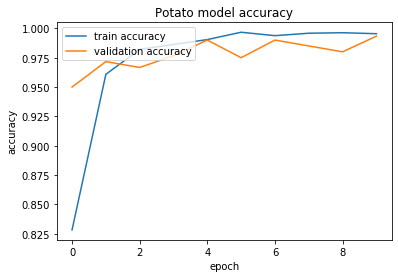

In [13]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Potato model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper left')
plt.show()

# Train and Test Loss Graph

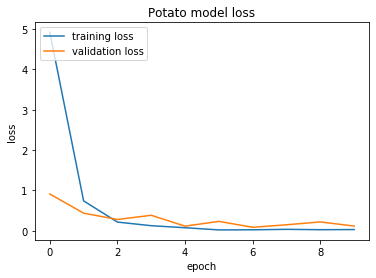

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Potato model loss')
plt.ylabel('loss')
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.show()

# Save the KERAS model and check the shape

In [15]:
print(KERAS_PATH)
model.save(KERAS_PATH) 
# Recreate the exact same model, including its weights and the optimizer
saved_model = tf.keras.models.load_model(KERAS_PATH)

# Show the model architecture
saved_model.summary()
saved_model.input_shape

/home/fakrul/Documents/PlantPathology/Model/128/keras/potato.h5
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)     

(None, 128, 128, 3)

# Saved Keras Model to Tensorflow Model Conversion

In [16]:
import tensorflow as tf
import tensorflow.keras.backend as K

K.set_learning_phase(0)

model_name = 's_potato_tensorflowmodel'

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        # Graph -> GraphDef ProtoBuf
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph




frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in saved_model.outputs], 
                              clear_devices=True)

tf.train.write_graph(frozen_graph, TensorFlow_PATH, model_name+".pb", as_text=False)

output_model_name = model_name + ".pb"
output_model_path = TensorFlow_PATH + output_model_name

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 86 variables.
INFO:tensorflow:Converted 86 variables to const ops.


# In memory Keras Model to TensorFlow Model Conversion 

In [17]:
import tensorflow as tf
import tensorflow.keras.backend as K

K.set_learning_phase(0)

model_name = 'm_potato_tensorflowmodel'

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        # Graph -> GraphDef ProtoBuf
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph




frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs], 
                              clear_devices=True)

tf.train.write_graph(frozen_graph, TensorFlow_PATH, model_name+".pb", as_text=False)

output_model_name = model_name + ".pb"
output_model_path = TensorFlow_PATH + output_model_name

INFO:tensorflow:Froze 86 variables.
INFO:tensorflow:Converted 86 variables to const ops.
